## Regresión lineal simple

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [2]:
!pip install openpyxl
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_excel("FuelConsumptionCo2.xlsx")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [4]:
# Exploracion de datos
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,945.0,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,2022.0,3.201058,5.670899,12.515767,9.374603,11.102222,27.222222,259.410582
std,0.0,1.374256,1.932837,3.452369,2.290217,2.878074,7.684409,64.486225
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,214.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,258.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,301.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
6,3.0,6,11.0,256
7,3.0,6,11.2,261
8,2.0,4,8.7,205


array([[<Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'ENGINESIZE'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>]], dtype=object)

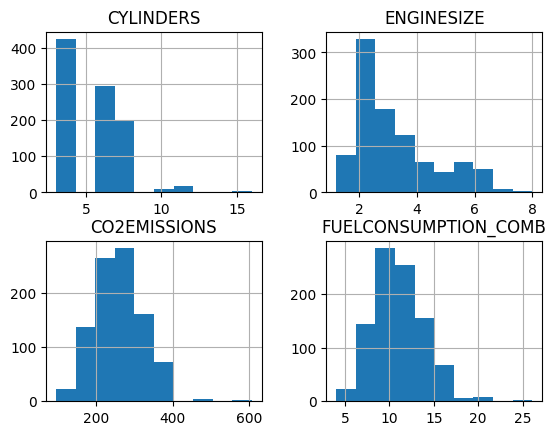

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()

Text(0, 0.5, 'Emission')

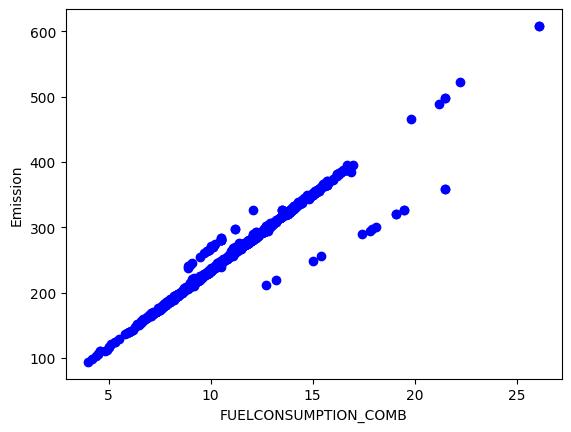

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

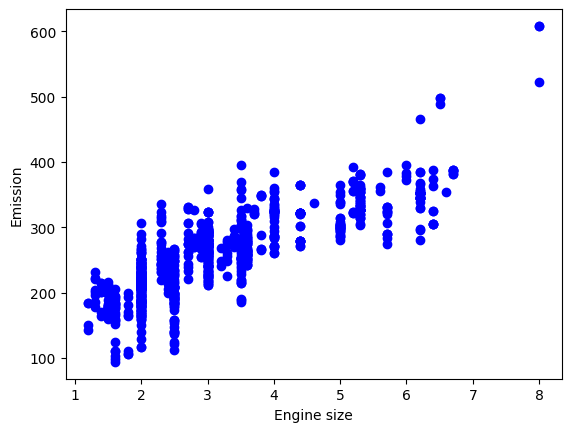

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")


Text(0, 0.5, 'Emission')

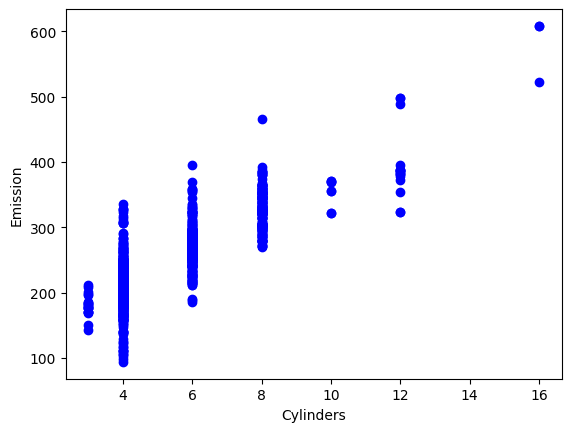

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")

In [10]:
msk = np.random.rand(len(df)) <= 0.80
msk

array([False, False,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,

In [11]:
train = cdf[msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,2.0,4,9.9,232
3,2.0,4,10.3,242
4,2.0,4,9.8,230
5,2.0,4,9.8,231
7,3.0,6,11.2,261
...,...,...,...,...
940,2.0,4,9.4,219
941,2.0,4,9.4,219
942,2.0,4,9.9,232
943,2.0,4,10.1,236


In [12]:
test = cdf[~msk]
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
6,3.0,6,11.0,256
10,2.9,6,11.6,271
13,2.9,6,12.3,288
...,...,...,...,...
918,2.0,4,10.7,252
919,3.6,6,11.7,275
924,1.5,4,6.8,159
925,1.5,4,6.9,161


Text(0, 0.5, 'Emission')

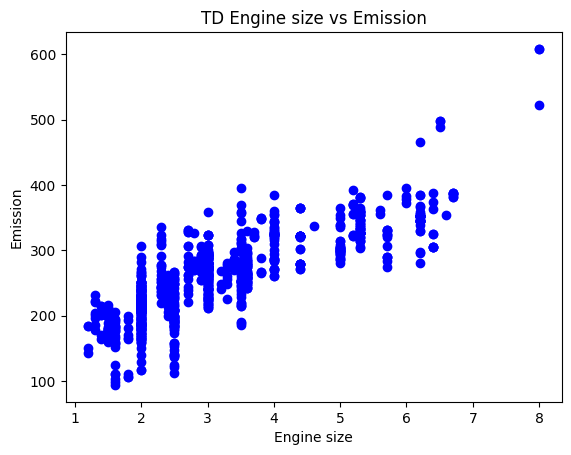

In [13]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.title("TD Engine size vs Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)


LinearRegression()

In [15]:
print ('Coeficiente de pendiente ', regr.coef_)
print ('Coeficiente de Intercepto ', regr.intercept_)

Coeficiente de pendiente  [[37.64075241]]
Coeficiente de Intercepto  [138.35613348]


CO2 EMISIONES = 136.48 + 38.26 (ENGINESIZE)

Text(0, 0.5, 'Emission')

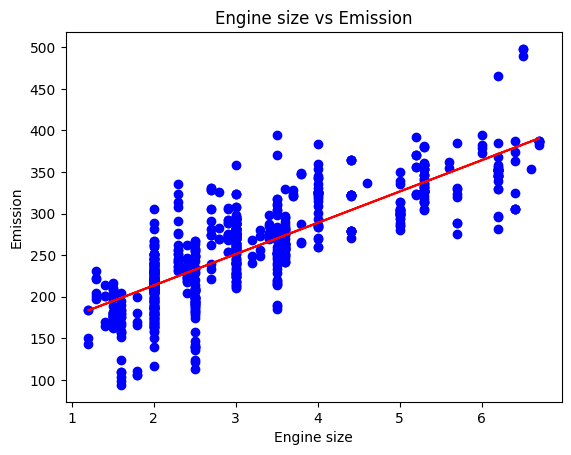

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.title("Engine size vs Emission")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

In [18]:
test_y_hat

array([[228.69393927],
       [270.09876692],
       [251.27839071],
       [247.51431547],
       [247.51431547],
       [288.91914312],
       [213.6376383 ],
       [251.27839071],
       [251.27839071],
       [334.08804602],
       [247.51431547],
       [251.27839071],
       [251.27839071],
       [288.91914312],
       [213.6376383 ],
       [213.6376383 ],
       [213.6376383 ],
       [213.6376383 ],
       [251.27839071],
       [251.27839071],
       [303.97544409],
       [303.97544409],
       [303.97544409],
       [303.97544409],
       [251.27839071],
       [303.97544409],
       [303.97544409],
       [251.27839071],
       [439.48215277],
       [439.48215277],
       [439.48215277],
       [187.28911161],
       [213.6376383 ],
       [239.98616499],
       [273.86284216],
       [251.27839071],
       [213.6376383 ],
       [273.86284216],
       [251.27839071],
       [337.85212126],
       [337.85212126],
       [337.85212126],
       [371.72879843],
       [371

In [19]:
test_y 

array([[200],
       [263],
       [256],
       [271],
       [288],
       [271],
       [178],
       [248],
       [273],
       [322],
       [267],
       [233],
       [262],
       [287],
       [195],
       [202],
       [202],
       [206],
       [301],
       [292],
       [322],
       [322],
       [322],
       [271],
       [323],
       [302],
       [302],
       [223],
       [522],
       [608],
       [608],
       [185],
       [216],
       [244],
       [303],
       [252],
       [225],
       [252],
       [298],
       [327],
       [339],
       [364],
       [345],
       [366],
       [345],
       [263],
       [332],
       [178],
       [277],
       [214],
       [307],
       [325],
       [289],
       [258],
       [277],
       [310],
       [317],
       [262],
       [216],
       [326],
       [269],
       [225],
       [256],
       [260],
       [277],
       [301],
       [308],
       [344],
       [357],
       [359],
       [313],
      

In [20]:
print ("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print ("Suma de los cuadrados de los errores (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print ("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Error medio absoluto: 28.28
Suma de los cuadrados de los errores (MSE): 1487.86
R2-score: 0.49


In [21]:
# probar con mas variables

cdf2= df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY' ,'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf2.head(9)

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,9.9,7.0,4,8.6,200
1,3.5,12.6,9.4,6,11.2,263
2,2.0,11.0,8.6,4,9.9,232
3,2.0,11.3,9.1,4,10.3,242
4,2.0,11.2,8.0,4,9.8,230
5,2.0,11.3,8.1,4,9.8,231
6,3.0,12.3,9.4,6,11.0,256
7,3.0,12.3,9.8,6,11.2,261
8,2.0,10.0,7.2,4,8.7,205


In [22]:
x = np.asanyarray(cdf2[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(cdf2[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coeficientes de variables independientes: ', regr.coef_)
print ('Coeficiente de Intercepto: ',regr.intercept_)

Coeficientes de variables independientes:  [[ 0.64718058  3.19806803 19.75582963]]
Coeficiente de Intercepto:  [19.8693863]


CO2EMISSIONS = 19.86 + 0.64 (ENGINESIZE) + 3.19 (CYLINDRES) + 19.75 (FUELCONSUMPTION_COMB)

In [23]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Error medio absoluto: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Suma de los cuadrados de los errores (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )


Error medio absoluto: 6.17
Suma de los cuadrados de los errores (MSE): 180.84
R2-score: 0.96


C:\Users\benma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Otros modelos de Regresión

In [24]:
def pol_grado(x,Beta_0,Beta_1):
    y = Beta_0 + Beta_1*x
    return y 

In [25]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado(x,3,2)
y_noise = 2 * np.random.normal(0,1,size=x.size)
ydata = y + y_noise

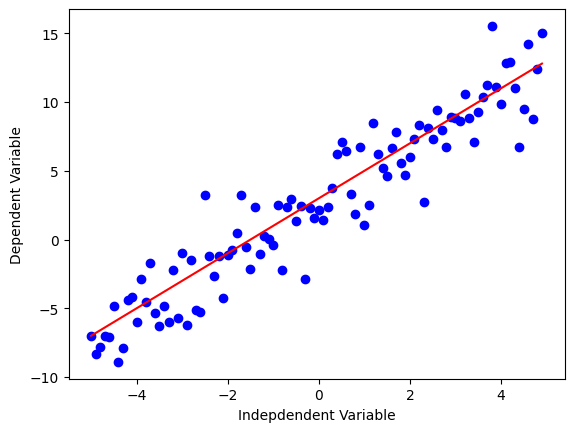

In [26]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [27]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(pol_grado, x, ydata)

In [28]:
print("Beta_0 = ", popt[0], "Beta_1 = ", popt[1])

Beta_0 =  2.648212606526819 Beta_1 =  2.0206858397701293


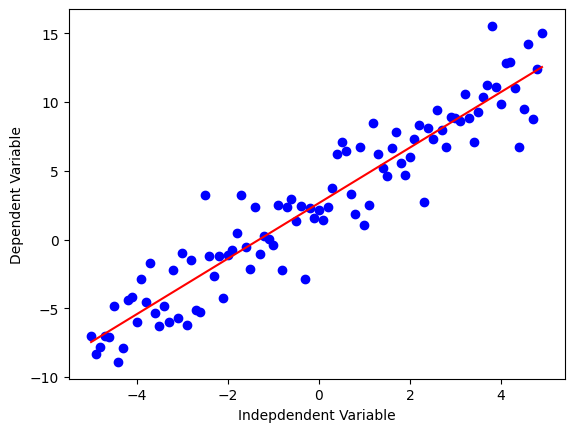

In [29]:
y_ajustado = pol_grado(x, popt[0], popt[1])
plt.plot(x, ydata, 'bo')
plt.plot(x, y_ajustado, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [30]:
# MODELO POLINOMIAL DE GRADO 3

def pol_grado3(x,Beta_0,Beta_1,Beta_2,Beta_3):
    y = Beta_0 + Beta_1*x + Beta_2*(x**2) + Beta_3*(x**3)
    return y

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
y = pol_grado3(x,3,1,1,1)
y_noise = 20 * np.random.normal(0,1,size=x.size)
ydata = y + y_noise

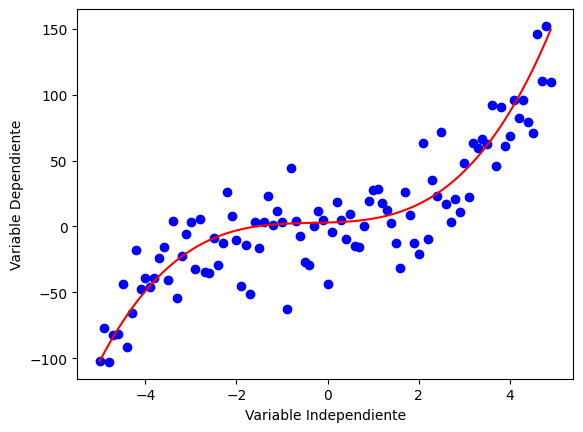

In [32]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r')
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

In [33]:
msk = np.random.rand(len(x)) < 0.8
msk

array([ True, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [34]:
train_x = x[msk]
test_x = x[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [35]:
# Optimizacion de los coeficientes
popt, pcov = curve_fit(pol_grado3, train_x, train_y)

In [36]:
print("Beta_0 = ", popt[0], "\nBeta_1 = ", popt[1], "\nBeta_2 = ", popt[2], "\nBeta_3 = ", popt[3])

Beta_0 =  -1.9993367914738758 
Beta_1 =  0.6405999940443128 
Beta_2 =  1.0337853481836967 
Beta_3 =  0.8977527496237163


In [37]:
# Prediccion

y_hat = pol_grado3(test_x, popt[0], popt[1], popt[2], popt[3])

In [38]:
print("Error medio absoluto: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Suma de los cuadrados de los errores (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Error medio absoluto: 21.72
Suma de los cuadrados de los errores (MSE): 682.43
R2-score: 0.70


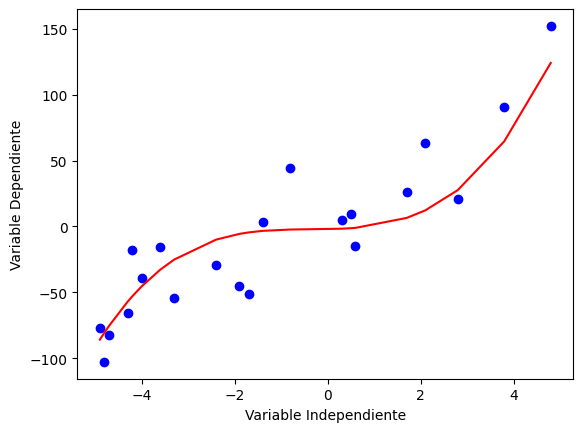

In [39]:
plt.plot(test_x, test_y, 'bo')
plt.plot(test_x, y_hat, 'r')
plt.ylabel('Variable Dependiente')
plt.xlabel('Variable Independiente')
plt.show()

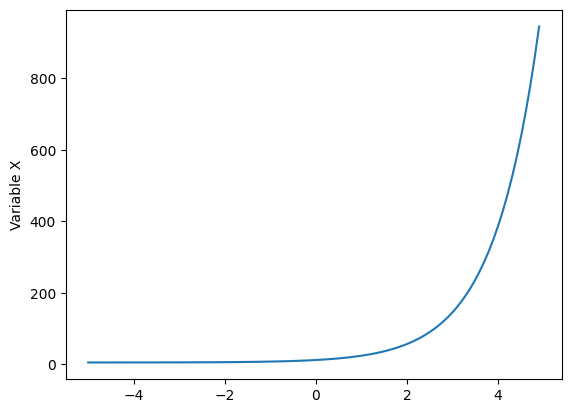

In [40]:
# Regresion exponencial

x = np.arange(-5.0, 5.0, 0.1)
y = 5 +7*np.exp(x)

plt.plot(x,y)
plt.ylabel('Variable Y')
plt.ylabel('Variable X')
plt.show()

C:\Users\benma\AppData\Local\Temp\ipykernel_16324\3886698320.py:4: RuntimeWarning: invalid value encountered in log
  y =2+6*np.log(x)


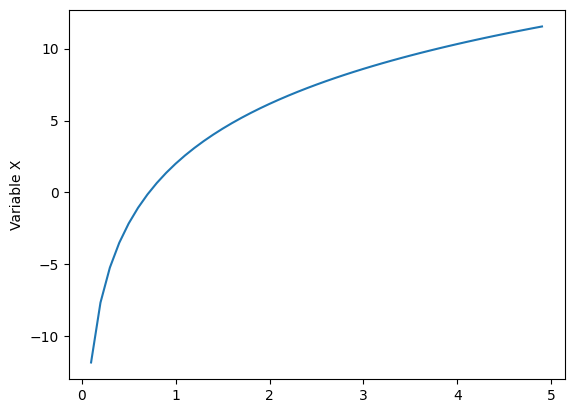

In [41]:
# Modelo logaritmico

x = np.arange(-5.0, 5.0, 0.1)
y =2+6*np.log(x)

plt.plot(x,y)
plt.ylabel('Variable Y')
plt.ylabel('Variable X')
plt.show()